***MORE FEATURES IN OUR EXISTING DATA***

In [30]:
import numpy as np
import pandas as pd
import os

# Load the existing version 2 preprocessed pickle file from the preprocessed folder
file_path = "C://GITHUB CODES//stock-predictor-ml//notebooks//data//processed//processed_reliance_data.pk1"
if os.path.exists(file_path):
    df = pd.read_pickle(file_path)
    df.info()
else:
    df = None
    print("File not found. Please upload the version_2_preprocessed.pkl file.")


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2368 entries, 2015-05-29 to 2024-12-31
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Close              2368 non-null   float64
 1   High               2368 non-null   float64
 2   Low                2368 non-null   float64
 3   Open               2368 non-null   float64
 4   Volume             2368 non-null   int64  
 5   Daily Returns      2368 non-null   float64
 6   Price Range        2368 non-null   float64
 7   Range %            2368 non-null   float64
 8   MA5                2368 non-null   float64
 9   MA10               2368 non-null   float64
 10  MA20               2368 non-null   float64
 11  MA50               2368 non-null   float64
 12  MA100              2368 non-null   float64
 13  StdDev5            2368 non-null   float64
 14  StdDev10           2368 non-null   float64
 15  Lag_1              2368 non-null   float64
 16  Lag_2 

In [31]:
# Ensure your DataFrame is sorted by date
df.sort_index(inplace=True)
df.head()

Price,Close,High,Low,Open,Volume,Daily Returns,Price Range,Range %,MA5,MA10,...,MA50,MA100,StdDev5,StdDev10,Lag_1,Lag_2,Cumulative Return,Day,Month,Weekday
Date,,,,,,,,,,,,,,,,,,,,,
2015-05-29,194.886902,196.986880,194.020239,195.531336,29277517,0.001370,2.966641,0.015172,196.317987,198.081300,...,192.583274,192.875860,1.673936,2.399270,194.620224,196.731308,1.000168,29,5,4
2015-06-01,200.497925,201.086820,195.109097,195.553539,19594976,0.028791,5.977724,0.030568,196.662424,198.319072,...,192.832432,192.932299,2.347679,2.518414,194.886902,194.620224,1.028964,1,6,0
2015-06-02,199.697937,204.175659,198.097955,201.275698,20178960,-0.003990,6.077705,0.030196,197.286859,198.387961,...,193.013799,192.985894,2.706641,2.548626,200.497925,194.886902,1.024859,2,6,1
2015-06-03,199.186859,202.320160,197.442438,199.775740,15546279,-0.002559,4.877722,0.024416,197.777969,198.110188,...,193.239809,193.055667,2.801742,2.249293,199.697937,200.497925,1.022236,3,6,2
2015-06-04,202.820129,203.597892,198.342392,200.931255,15931395,0.018241,5.255500,0.026156,199.417950,198.464629,...,193.547481,193.249005,2.889782,2.689540,199.186859,199.697937,1.040882,4,6,3


In [69]:
df['Lag_10'] = df['Close'].shift(10)

In [32]:
# MACD
ema_12 = df['Close'].ewm(span=12, adjust=False).mean()
ema_26 = df['Close'].ewm(span=26, adjust=False).mean()
df['MACD'] = ema_12 - ema_26
df['Signal_Line'] = df['MACD'].ewm(span=9, adjust=False).mean()

In [33]:
# Calculate delta
delta = df['Close'].diff()

# Separate gains and losses
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)

# Calculate the average gain and loss using exponential moving average (EMA is smoother than SMA)
avg_gain = gain.rolling(window=14, min_periods=14).mean()
avg_loss = loss.rolling(window=14, min_periods=14).mean()

# Prevent division by zero
rs = avg_gain / avg_loss.replace(0, np.nan)

# Compute RSI
df['RSI'] = 100 - (100 / (1 + rs))

# Optional: fill or drop NaN if needed
df.dropna(subset=['RSI'], inplace=True)


In [34]:
# Bollinger Bands
rolling_mean = df['Close'].rolling(window=20).mean()
rolling_std = df['Close'].rolling(window=20).std()
df['Bollinger_Mid'] = rolling_mean
df['Bollinger_Upper'] = rolling_mean + (2 * rolling_std)
df['Bollinger_Lower'] = rolling_mean - (2 * rolling_std)

In [35]:
# EMA (you can choose other periods too)
df['EMA_10'] = df['Close'].ewm(span=10, adjust=False).mean()
df['EMA_20'] = df['Close'].ewm(span=20, adjust=False).mean()


In [36]:
#df.info()
# Show only columns with at least one NaN
df.isna().sum()[df.isna().sum() > 0]


Price
Bollinger_Mid      19
Bollinger_Upper    19
Bollinger_Lower    19
dtype: int64

In [70]:
df.head()

Price,Close,High,Low,Open,Volume,Daily Returns,Price Range,Range %,MA5,MA10,...,Weekday,MACD,Signal_Line,RSI,Bollinger_Mid,Bollinger_Upper,Bollinger_Lower,EMA_10,EMA_20,Lag_10
Date,,,,,,,,,,,,,,,,,,,,,
2015-07-14,221.731064,224.775479,221.153294,224.197709,9942927,-0.009136,3.622186,0.016156,221.802167,222.955486,...,1,4.755657,5.608772,52.966484,221.261060,229.011642,213.510479,222.069524,220.033478,NaN
2015-07-15,224.697693,225.419902,222.119941,222.164384,13532911,0.013379,3.299961,0.014854,222.448828,223.077705,...,2,4.661410,5.419300,52.844847,222.149384,226.149996,218.148772,222.547373,220.477689,NaN
2015-07-16,227.486542,228.397647,224.697687,224.886568,14854295,0.012412,3.699960,0.016453,224.062140,223.363258,...,3,4.756920,5.286824,59.222072,222.646601,226.707659,218.585543,223.445403,221.145199,NaN
2015-07-17,227.042099,229.142077,226.219894,227.830987,10195142,-0.001954,2.922183,0.012826,224.946573,223.685478,...,4,4.742086,5.177876,63.200706,222.924930,227.390884,218.458975,224.099348,221.706808,NaN
2015-07-20,227.719879,228.875420,226.197672,228.397645,6348354,0.002985,2.677748,0.011724,225.735455,223.889920,...,0,4.730491,5.088399,61.138771,223.292148,228.072208,218.512088,224.757626,222.279482,NaN


In [71]:
df.dropna(inplace=True)

In [72]:
df.head()

Price,Close,High,Low,Open,Volume,Daily Returns,Price Range,Range %,MA5,MA10,...,Weekday,MACD,Signal_Line,RSI,Bollinger_Mid,Bollinger_Upper,Bollinger_Lower,EMA_10,EMA_20,Lag_10
Date,,,,,,,,,,,,,,,,,,,,,
2015-07-28,224.497681,225.930988,222.242139,224.064349,13382878,0.004874,3.688849,0.016463,228.279874,227.229883,...,1,3.644468,4.505885,53.824594,225.092684,231.949613,218.235755,226.280273,224.530855,221.731064
2015-07-29,221.331039,225.042125,220.464392,224.331012,14790821,-0.014105,4.577733,0.020406,225.862115,226.893217,...,2,3.004311,4.205570,52.343281,224.985461,232.013792,217.957131,225.380412,224.226111,224.697693
2015-07-30,222.253265,223.997701,220.508844,222.242155,11701228,0.004167,3.488857,0.015698,223.855469,226.369890,...,3,2.542093,3.872875,49.523802,224.866574,231.999807,217.733341,224.811840,224.038221,227.486542
2015-07-31,222.631042,223.975479,219.997737,222.219932,16634259,0.001700,3.977742,0.017900,222.824365,225.928784,...,4,2.181123,3.534524,48.483076,224.807131,231.996681,217.617581,224.415331,223.904204,227.042099
2015-08-03,222.764374,225.297683,222.086607,222.442164,9887787,0.000599,3.211076,0.014436,222.695480,225.433234,...,0,1.884092,3.204438,51.442735,224.661577,231.894846,217.428307,224.115157,223.795649,227.719879


In [73]:
df.to_pickle('C://GITHUB CODES//stock-predictor-ml//notebooks//data//processed//preprocessed_data_version_2.pk1')
print("New features added and saved to preprocessed_data_version_2.pkl.")


New features added and saved to preprocessed_data_version_2.pkl.


In [74]:
df.to_csv('C://GITHUB CODES//stock-predictor-ml//notebooks//data//raw//preprocessed_data_version_2.csv')
print("New features added and saved to preprocessed_data_version_2.csv")


New features added and saved to preprocessed_data_version_2.csv


In [75]:
X = df.drop(columns=['Close'])  # All except target
y = df['Close']


In [76]:
corr_matrix = X.corr()

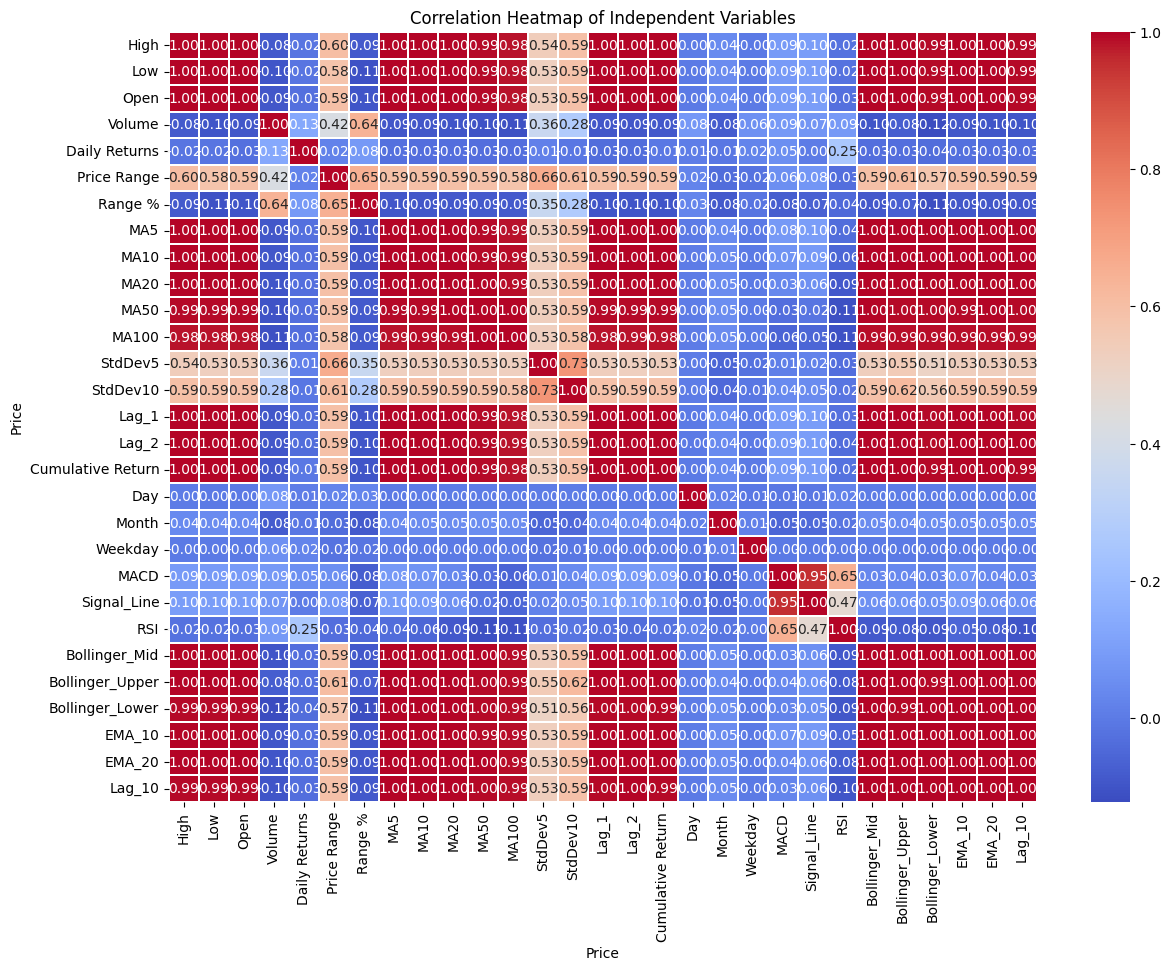

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.1)
plt.title("Correlation Heatmap of Independent Variables")
plt.show()


In [78]:
# Step 1: Calculate correlation matrix
corr_matrix = X.corr().abs()


In [79]:
# Step 2: Upper triangle of correlation matrix (to avoid duplicate checks)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))


In [80]:
# Step 3: Find features with correlation greater than 0.75
to_drop = [column for column in upper.columns if any(upper[column] > 0.75)]

print("Features to drop due to high correlation:\n", to_drop)


Features to drop due to high correlation:
 ['Low', 'Open', 'MA5', 'MA10', 'MA20', 'MA50', 'MA100', 'Lag_1', 'Lag_2', 'Cumulative Return', 'Signal_Line', 'Bollinger_Mid', 'Bollinger_Upper', 'Bollinger_Lower', 'EMA_10', 'EMA_20', 'Lag_10']


In [81]:
# Step 4: Drop them from the DataFrame
X_reduced = X.drop(columns=to_drop)
X_reduced.head()

Price,High,Volume,Daily Returns,Price Range,Range %,StdDev5,StdDev10,Day,Month,Weekday,MACD,RSI
Date,,,,,,,,,,,,
2015-07-28,225.930988,13382878,0.004874,3.688849,0.016463,4.492992,3.395256,28,7,1,3.644468,53.824594
2015-07-29,225.042125,14790821,-0.014105,4.577733,0.020406,4.283319,3.815186,29,7,2,3.004311,52.343281
2015-07-30,223.997701,11701228,0.004167,3.488857,0.015698,2.500261,4.074845,30,7,3,2.542093,49.523802
2015-07-31,223.975479,16634259,0.001700,3.977742,0.017900,1.197403,4.229796,31,7,4,2.181123,48.483076
2015-08-03,225.297683,9887787,0.000599,3.211076,0.014436,1.152614,4.286547,3,8,0,1.884092,51.442735


In [83]:
# No shuffling, order is preserved
split = int(len(X_reduced) * 0.8)
x_train, x_test = X_reduced[:split], X_reduced[split:]
y_train, y_test = y[:split], y[split:]


In [89]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1860 entries, 2015-07-28 to 2023-02-06
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   High           1860 non-null   float64
 1   Volume         1860 non-null   int64  
 2   Daily Returns  1860 non-null   float64
 3   Price Range    1860 non-null   float64
 4   Range %        1860 non-null   float64
 5   StdDev5        1860 non-null   float64
 6   StdDev10       1860 non-null   float64
 7   Day            1860 non-null   int32  
 8   Month          1860 non-null   int32  
 9   Weekday        1860 non-null   int32  
 10  MACD           1860 non-null   float64
 11  RSI            1860 non-null   float64
dtypes: float64(8), int32(3), int64(1)
memory usage: 167.1 KB


In [84]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [85]:
import pandas as pd

predictions = model.predict(x_test)
pred_series = pd.Series(predictions.flatten(), index = y_test.index)
pred_series.info()
pred_series

<class 'pandas.core.series.Series'>
DatetimeIndex: 466 entries, 2023-02-07 to 2024-12-31
Series name: None
Non-Null Count  Dtype  
--------------  -----  
466 non-null    float64
dtypes: float64(1)
memory usage: 7.3 KB


Date
2023-02-07    1057.577157
2023-02-08    1073.691209
2023-02-09    1078.151987
2023-02-10    1069.213057
2023-02-13    1067.212666
                 ...     
2024-12-24    1226.381387
2024-12-26    1218.421457
2024-12-27    1221.885137
2024-12-30    1212.563392
2024-12-31    1212.552834
Length: 466, dtype: float64

In [86]:
from sklearn.metrics import mean_squared_error, r2_score

print('MSE: ', mean_squared_error(y_test, pred_series))
print('R² Score: ', r2_score(y_test, pred_series))

MSE:  27.949665519097756
R² Score:  0.998788177047811


In [87]:
print(y_test.shape)
print(pred_series.shape)

(466,)
(466,)


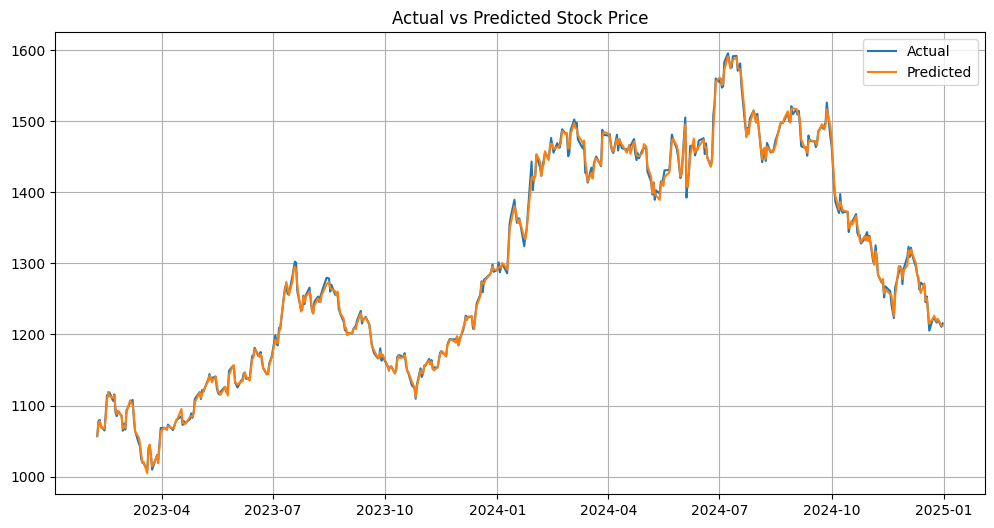

In [88]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12,6))
plt.plot(y_test.index, y_test.values, label='Actual')
plt.plot(y_test.index, pred_series, label='Predicted')
plt.title("Actual vs Predicted Stock Price")
plt.legend()
plt.grid(True)
plt.show()